In [ ]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest

from sklearn.impute import SimpleImputer

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [ ]:
df = pd.read_csv('Building_Permits.csv')
df


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [ ]:
#df.isna().sum()
df.isnull().sum() * 100 / len(df)

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Number Suffix                      98.885872
Street Name                                0.000000
Street Suffix                              1.391654
Unit                                      85.178984
Unit Suffix                               99.014077
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                            51.135747
First Construction Document Date           7.514329
Structural N

In [ ]:
df.isna().sum().sum()

2245941

 # Drop

- Street Number Suffix
- Unit
- Unit Suffix
- Completed Date
- Structural Notification
- Voluntary Soft-Story Retrofit
- Fire Only Permit
- Site Permit
- TIDF Compliance
- Site Permit


San Francisco has two numbered series: streets, which run generally east–west, and avenues, which are north–south. The two series do not meet.

The numbered streets begin with 1st Street in SoMa and end with 30th Street in Noe Valley. Some of these streets are only nominally east–west, which causes anomalies such as 3rd Street meeting 26th Street in the Dogpatch.

The numbered avenues are in the Richmond and Sunset Districts beginning with 2nd Avenue and continuing westward to 48th Avenue, which runs parallel to the Pacific Ocean shore.

We donot have any suffix for the street number --> They don't exist and hence we can drop the column

In [ ]:
df = df.drop(['Street Number Suffix'],axis=1)
df = df.drop(['Unit'],axis=1)
df = df.drop(['Unit Suffix'],axis=1)
df = df.drop(['Completed Date'],axis=1)
df = df.drop(['Structural Notification'],axis=1)
df = df.drop(['Voluntary Soft-Story Retrofit'],axis=1)
df = df.drop(['Fire Only Permit'],axis=1)
df = df.drop(['Site Permit'],axis=1)
df = df.drop(['TIDF Compliance'],axis=1)

df


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,2.0,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [ ]:
df.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'First Construction Document Date',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID'],
      dtype='object')

In [ ]:
new_df = df.isnull().sum() * 100 / len(df)
new_df[new_df.values > 0] #index the boolean into the df

Street Suffix                              1.391654
Description                                0.145802
Issued Date                                7.511312
First Construction Document Date           7.514329
Number of Existing Stories                21.510307
Number of Proposed Stories                21.552539
Permit Expiration Date                    26.083459
Estimated Cost                            19.138260
Revised Cost                               3.049774
Existing Use                              20.670689
Existing Units                            25.911513
Proposed Use                              21.336853
Proposed Units                            25.596280
Plansets                                  18.757667
Existing Construction Type                21.802916
Existing Construction Type Description    21.802916
Proposed Construction Type                21.700352
Proposed Construction Type Description    21.700352
Supervisor District                        0.863248
Neighborhood

In [ ]:
!pip install missingo

ERROR: Could not find a version that satisfies the requirement missingo
ERROR: No matching distribution found for missingo
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import missingo as m
m.matrix(df)

ModuleNotFoundError: No module named 'missingo'

In [ ]:
df['Street Suffix'].value_counts()

St    138358
Av     43219
Bl      3555
Wy      3540
Dr      3267
Tr      1466
Ct       667
Pl       538
Rd       389
Ln       354
Hy       240
Pz       210
Pk       128
Cr        97
Al        83
Wk         9
Rw         5
So         2
Sw         2
No         2
Hl         1
Name: Street Suffix, dtype: int64

In [ ]:
df['Street Suffix'].value_counts() / df.shape[0]
#index.value_counts()

St    0.695616
Av    0.217290
Bl    0.017873
Wy    0.017798
Dr    0.016425
Tr    0.007371
Ct    0.003353
Pl    0.002705
Rd    0.001956
Ln    0.001780
Hy    0.001207
Pz    0.001056
Pk    0.000644
Cr    0.000488
Al    0.000417
Wk    0.000045
Rw    0.000025
So    0.000010
Sw    0.000010
No    0.000010
Hl    0.000005
Name: Street Suffix, dtype: float64

In [ ]:
df['Street Suffix'].unique()

array(['St', 'Av', 'Tr', 'Ct', 'Bl', 'Wy', 'Dr', nan, 'Rd', 'Cr', 'Pl',
       'Ln', 'Hy', 'Pk', 'Al', 'Pz', 'Wk', 'Rw', 'So', 'Sw', 'No', 'Hl'],
      dtype=object)

In [ ]:
# imp = SimpleImputer(strategy='most_frequent')
# imp.fit(df['Street Suffix'])
# #imp.transform(df['Street Suffix'].values)

In [ ]:
# test_1 = df['Street Suffix']
# # imputer = SimpleImputer(missing_values=float, strategy='most_frequent')
# # imputer.fit(test_1)

# imp = SimpleImputer(missing_values=float, strategy="most_frequent")#, axis=0)
# test_1 = imp.fit_transform(test_1).ravel()

In [ ]:
df['Street Suffix'].shape

(198900,)

In [ ]:
np.array(df['Street Suffix']).shape

(198900,)

In [ ]:
# df['Street Suffix'].dtypes
df['Street Suffix'].apply(type).value_counts()

<class 'str'>      196132
<class 'float'>      2768
Name: Street Suffix, dtype: int64

In [ ]:
#list comprehension
#cat = [key for key, value in dict(['A':1,'B':2])]
list = ['Street Suffix', 'Permit Type Definition', 'Street Name','Description','Existing Construction Type Description','Proposed Construction Type Description','Neighborhoods - Analysis Boundaries']
cat_vars  = [i.lower() for i in list if i=='Street Name']
cat_vars

['street name']

In [ ]:
cat_vars  = ['Street Suffix', 'Permit Type Definition', 'Street Name','Description','Existing Construction Type Description	','Proposed Construction Type Description','Neighborhoods - Analysis Boundaries	']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Permit Type', 'Block', 'Street Number', 'Plansets	', 'Existing Construction Type','Proposed Construction Type','Zipcode','Supervisor District','Record ID'] # x.select_dtypes(exclude=[object]).columns.values.tolist()

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Permit Type', 'Block', 'Street Number', 'Plansets\t', 'Existing Construction Type', 'Proposed Construction Type', 'Zipcode', 'Supervisor District', 'Record ID']

Categorical features:
 ['Street Suffix', 'Permit Type Definition', 'Street Name', 'Description', 'Existing Construction Type Description\t', 'Proposed Construction Type Description', 'Neighborhoods - Analysis Boundaries\t']


In [ ]:
num_4_treeModels = pipeline.Pipeline(steps=[
   ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)), # mean, median
])

cat_4_treeModels = pipeline.Pipeline(steps=[
   ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', preprocessing.OrdinalEncoder(handle_unknown='ignore'))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro




ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Block', 'Street Number',
                                  'Plansets\t', 'Existing Construction Type',
                                  'Proposed Construction Type', 'Zipcode',
                                  'Supervisor District', 'Record ID']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='ignore'))]),
                                 ['Street Suffix', 'Permit Type Definition',
                                  'Street Name', 'Description',
                                  'Existing Construction Type Description\t',
                                  'Proposed Construction Type Description',
                                  'Neighborhoods - Analysis Boundaries\t'])])

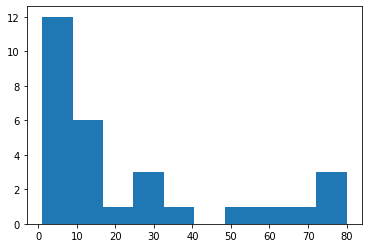

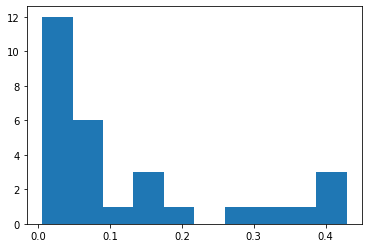

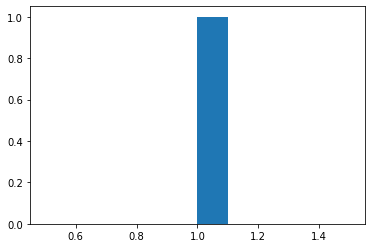

In [ ]:
a = [1, 2,2,2,3, 3, 4,5,5,5,5, 5,10,10,10,10,10,10,20,30,30,30,40, 50 ,60, 70, 75, 79, 80]
plt.hist(a)
plt.show()
#Gauss
a_norm = a / np.linalg.norm(a)
plt.hist(a_norm)
plt.show()

from sklearn.preprocessing import normalize
b = b.reshape(1, -1)
#which one
b = normalize(b)
plt.hist(b)
plt.show()

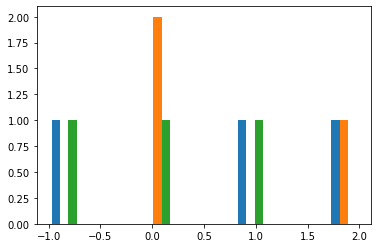

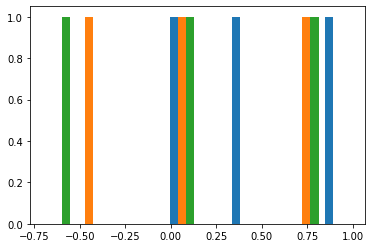

In [ ]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

#random numbers to understand nomalization

plt.hist(X)
plt.show()

X_normalized = preprocessing.normalize(X, norm='l2')
plt.hist(X_normalized)
plt.show()


normalizer = preprocessing.Normalizer().fit(X) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32ebab46-e526-42a3-8966-92f4ff6ef571' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>